In [24]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels as st

In [25]:
df = pd.read_csv("/content/PublicGoodExperiment.csv")

***Renaming column to shorten the data***

In [26]:
df.rename(columns= {"Family's Gross Income Bracket (Before taxes and other deductions)" : "Family Income"}, inplace=True)
df.rename(columns= {"On a scale, how close/familiar are you to your traditional culture?" : "Cultural Closeness"}, inplace=True)
df.rename(columns= {"Which type of school did you go during high school?" : "School Type"}, inplace=True)
df.rename(columns= {"Is the school you went a boarding school?" : "Boarding School"}, inplace=True)
df.rename(columns= {"How would you describe your hometown?" : "Hometown Type"}, inplace=True)
df.rename(columns= {"How much would you like to contribute to the common pool? (Referring to RM)" : "Contribution"}, inplace=True)

***Cleaning time :)***

In [27]:
df.head()

,Family Income,Race,Cultural Closeness,Gender,School Type,Hometown Type,Contribution
0,Less than RM 4 001,Chinese,3,Male,SMK,City,10
1,RM 10 001 - RM 15 000,Malay,1,Male,SBP/MRSM,City,10
2,More than RM 30 000,Malay,3,Female,Private/International,Suburban,5
3,More than RM 30 000,Malay,3,Male,Private/International,Rural,10
4,Less than RM 4 001,Mixed,4,Male,SMK,Rural,10


In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [29]:
cleanup_fam = {"Family Income" : {"Less than RM 4 001" : 1, "RM 4 001 - RM 7 000" : 2, "RM 7 001 - RM 10 000" : 3, "RM 10 001 - RM 15 000" : 4, "RM 15 001 - RM 20 000" : 5, "RM 20 001 - RM 30 000" : 6, "More than RM 30 000" : 7}}
df = df.replace(cleanup_fam)
df["Family Income"].value_counts()


7    81
1    60
4    53
6    38
2    35
3    32
5    28
Name: Family Income, dtype: int64

In [30]:
cleanup_race = {"Race" : {"Malay" : 1, "Chinese" : 2, "Indian" : 3, "bumiputera" : 4, "Kadazan" : 4, "Punjabi" : 3, "Siamese" : 4, "Melanau" : 4, "Bumiputera Sabah" : 4, "Melanau(Bumiputera Sarawak) " : 4, "Sikh" : 3, "Malaysian" : 1, "Attack Helicopter" : 1, "Dusun" : 4, "Azerbaijani " : 5, "Mixed" : 4}}
df = df.replace(cleanup_race)
df["Race"].value_counts()

1    201
2     70
4     33
3     22
5      1
Name: Race, dtype: int64

In [31]:
df["Gender Cat"] = labelencoder.fit_transform(df["Gender"])
df["Gender Cat"].value_counts()

0    178
1    149
Name: Gender Cat, dtype: int64

In [32]:
cleanup_school = {"School Type" : {"Private/International" : 1, "SBP/MRSM" : 2, "SMJK" : 3, "SMKA" : 4, "SMK" : 5, "SMK & International" : 1, "Kolej Genius Insan" : 1, "homeschool" : 1, "SMK 4 years  private 1 year" : 5, "SABK" : 4, "Chinese Independent School" : 3, "Sabk" : 4, "Sm imtiaz" : 4, "adni islamic school" : 1}}
df = df.replace(cleanup_school)
df["School Type"].value_counts()

2    108
1    107
5     94
3     10
4      8
Name: School Type, dtype: int64

In [33]:
cleanup_hometown = {"Hometown Type" : {"City" : 1, "Suburban" : 3, "Town" : 2, "Rural" : 4}}
df = df.replace(cleanup_hometown)

In [34]:
df.drop(["Gender"], axis=1, inplace=True)

In [35]:
df.head()

,Family Income,Race,Cultural Closeness,School Type,Hometown Type,Contribution,Gender Cat
0,1,2,3,5,1,10,1
1,4,1,1,2,1,10,1
2,7,1,3,1,3,5,0
3,7,1,3,1,4,10,1
4,1,4,4,5,4,10,1


In [36]:
df.dtypes

Family Income         int64
Race                  int64
Cultural Closeness    int64
School Type           int64
Hometown Type         int64
Contribution          int64
Gender Cat            int64
dtype: object

***Time to find relationship !!!***

In [37]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import axes

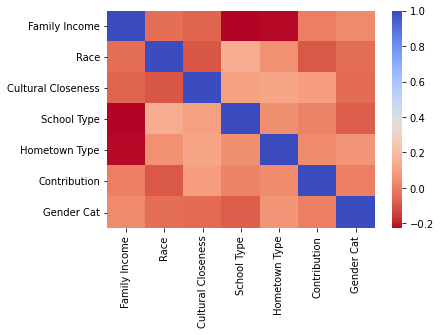

In [38]:
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm_r", annot_kws={'size':20})

In [39]:
corr

,Family Income,Race,Cultural Closeness,School Type,Hometown Type,Contribution,Gender Cat
Family Income,1.000000,-0.038798,-0.058932,-0.226353,-0.219361,0.006915,0.037055
Race,-0.038798,1.000000,-0.094397,0.143522,0.055589,-0.087638,-0.036091
Cultural Closeness,-0.058932,-0.094397,1.000000,0.103305,0.116775,0.091860,-0.045428
School Type,-0.226353,0.143522,0.103305,1.000000,0.051346,0.015951,-0.077437
Hometown Type,-0.219361,0.055589,0.116775,0.051346,1.000000,0.040752,0.065901
Contribution,0.006915,-0.087638,0.091860,0.015951,0.040752,1.000000,0.006850
Gender Cat,0.037055,-0.036091,-0.045428,-0.077437,0.065901,0.006850,1.000000


In [40]:
df.head()

,Family Income,Race,Cultural Closeness,School Type,Hometown Type,Contribution,Gender Cat
0,1,2,3,5,1,10,1
1,4,1,1,2,1,10,1
2,7,1,3,1,3,5,0
3,7,1,3,1,4,10,1
4,1,4,4,5,4,10,1


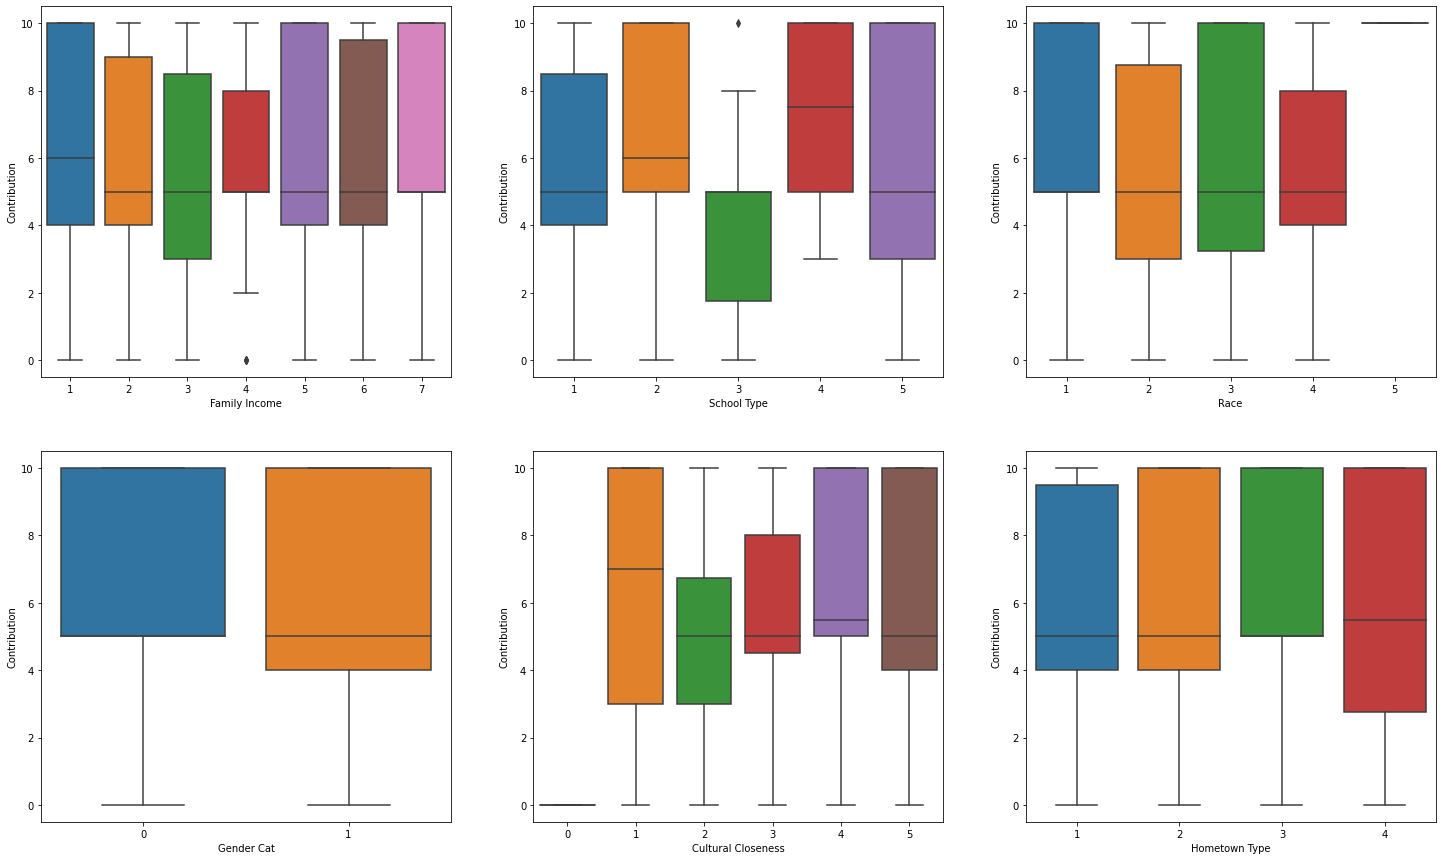

In [41]:
f, axes = plt.subplots(ncols = 3, nrows = 2, figsize = (25,15))

sns.boxplot(data=df, x="Family Income", y="Contribution", ax=axes[0, 0])
sns.boxplot(data=df, x="School Type", y="Contribution", ax=axes[0, 1])
sns.boxplot(data=df, x="Race", y="Contribution", ax=axes[0, 2])
sns.boxplot(data=df, x="Gender Cat", y="Contribution", ax=axes[1, 0])
sns.boxplot(data=df, x="Cultural Closeness", y="Contribution", ax=axes[1, 1])
sns.boxplot(data=df, x="Hometown Type", y="Contribution", ax=axes[1, 2])

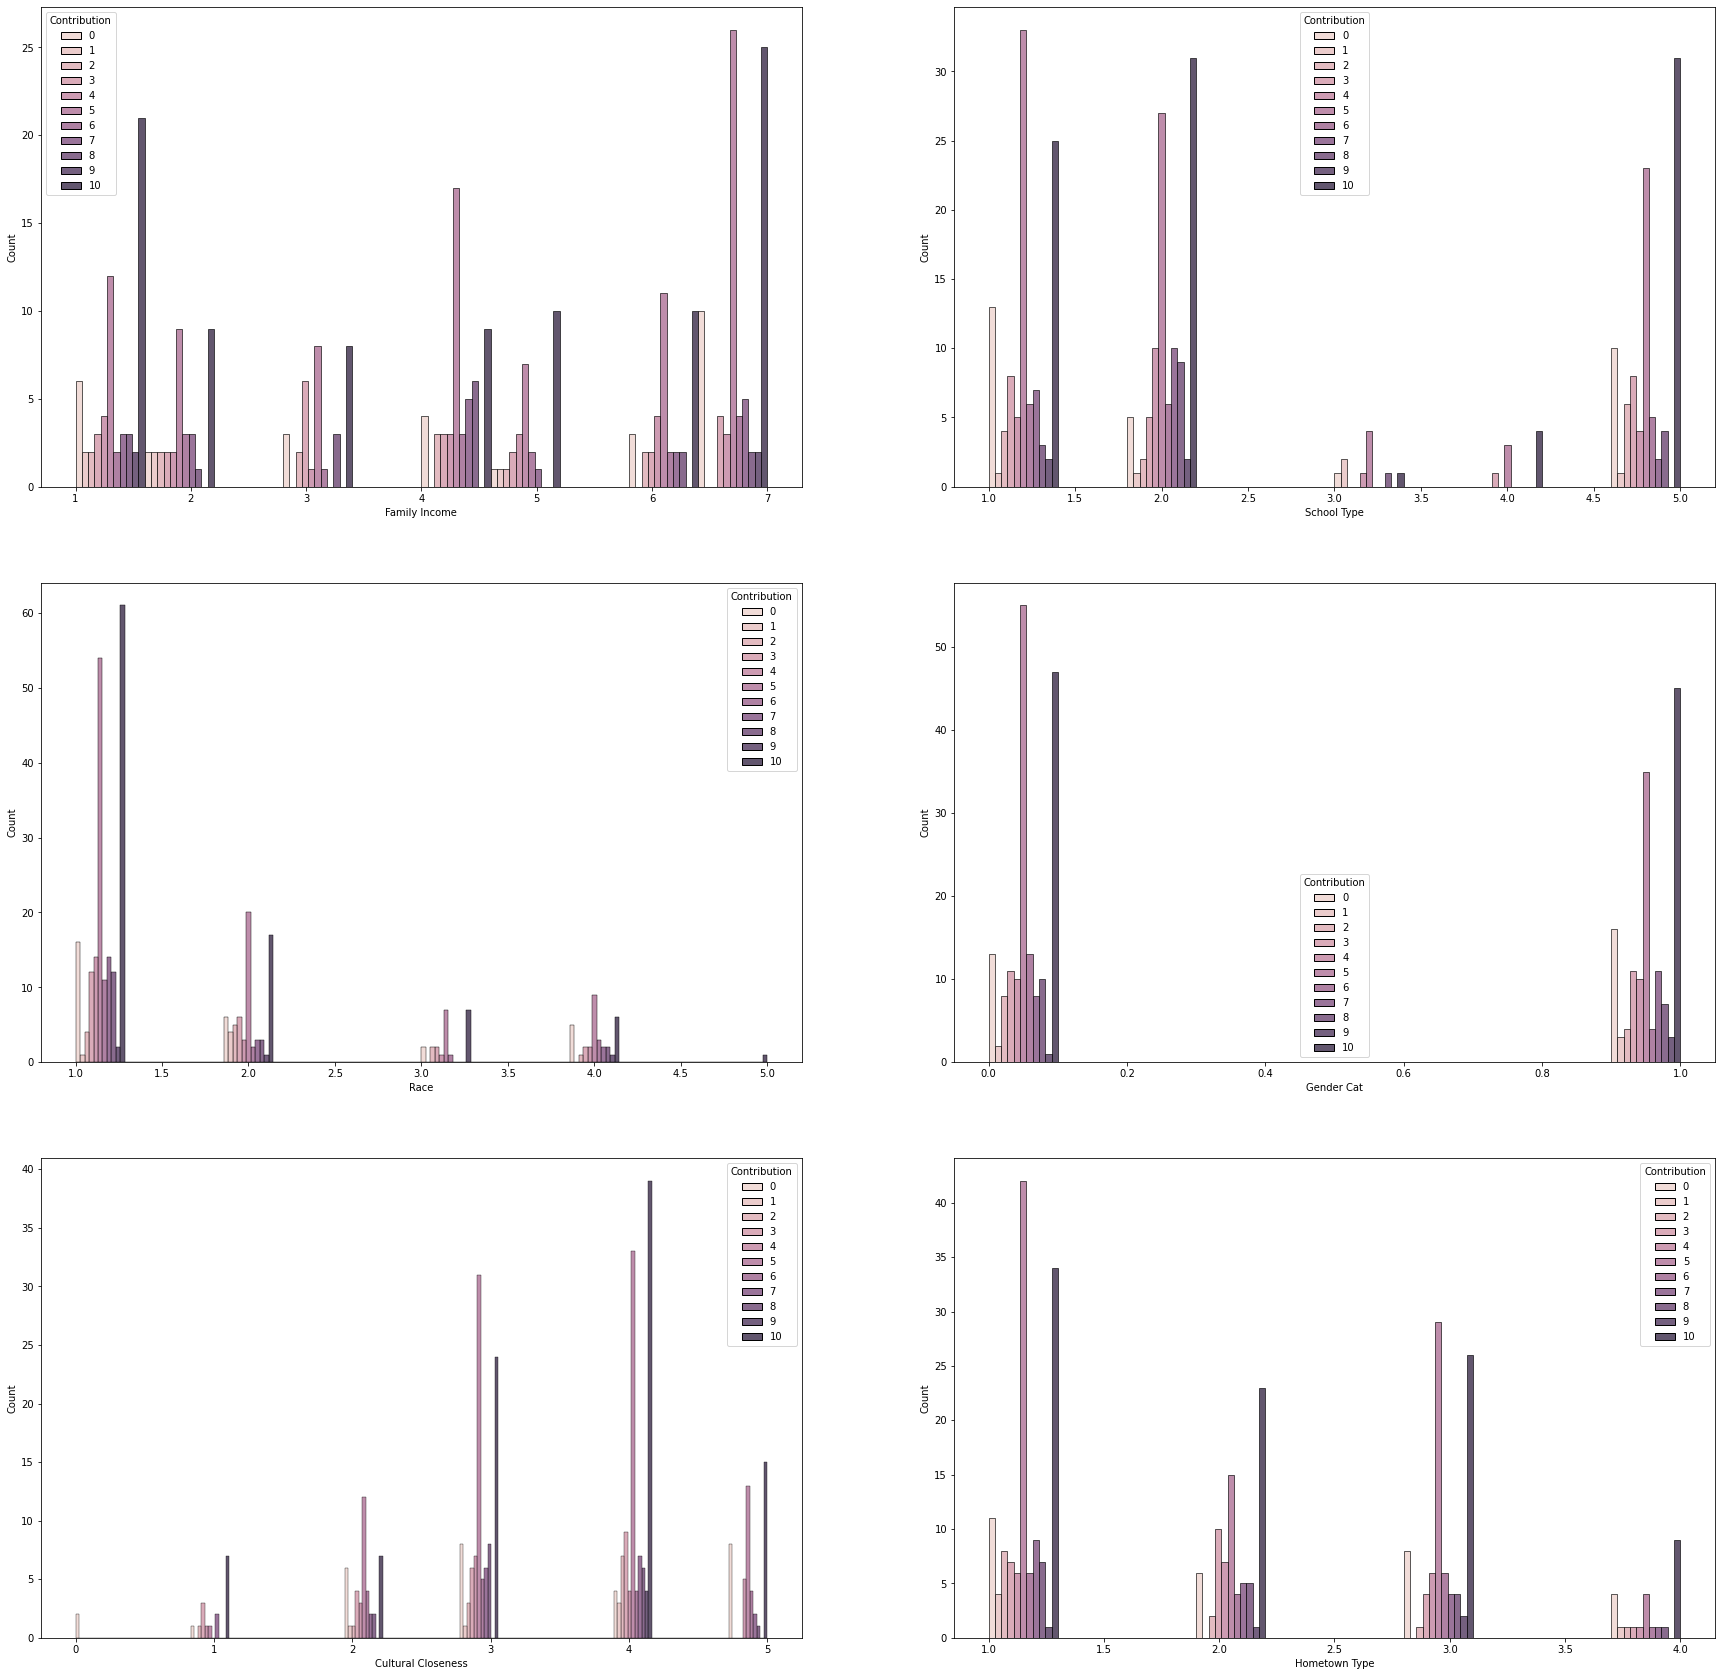

In [42]:
f, axes = plt.subplots(ncols = 2, nrows=3, figsize = (30,30))

sns.histplot(data=df, x="Family Income", hue="Contribution", ax=axes[0,0], multiple="dodge")
sns.histplot(data=df, x="School Type", hue="Contribution", ax=axes[0,1], multiple="dodge")
sns.histplot(data=df, x="Race", hue="Contribution", ax=axes[1,0], multiple="dodge")
sns.histplot(data=df, x="Gender Cat", hue="Contribution", ax=axes[1,1], multiple="dodge")
sns.histplot(data=df, x="Cultural Closeness", hue="Contribution", ax=axes[2,0], multiple="dodge")
sns.histplot(data=df, x="Hometown Type", hue="Contribution", ax=axes[2,1], multiple="dodge")

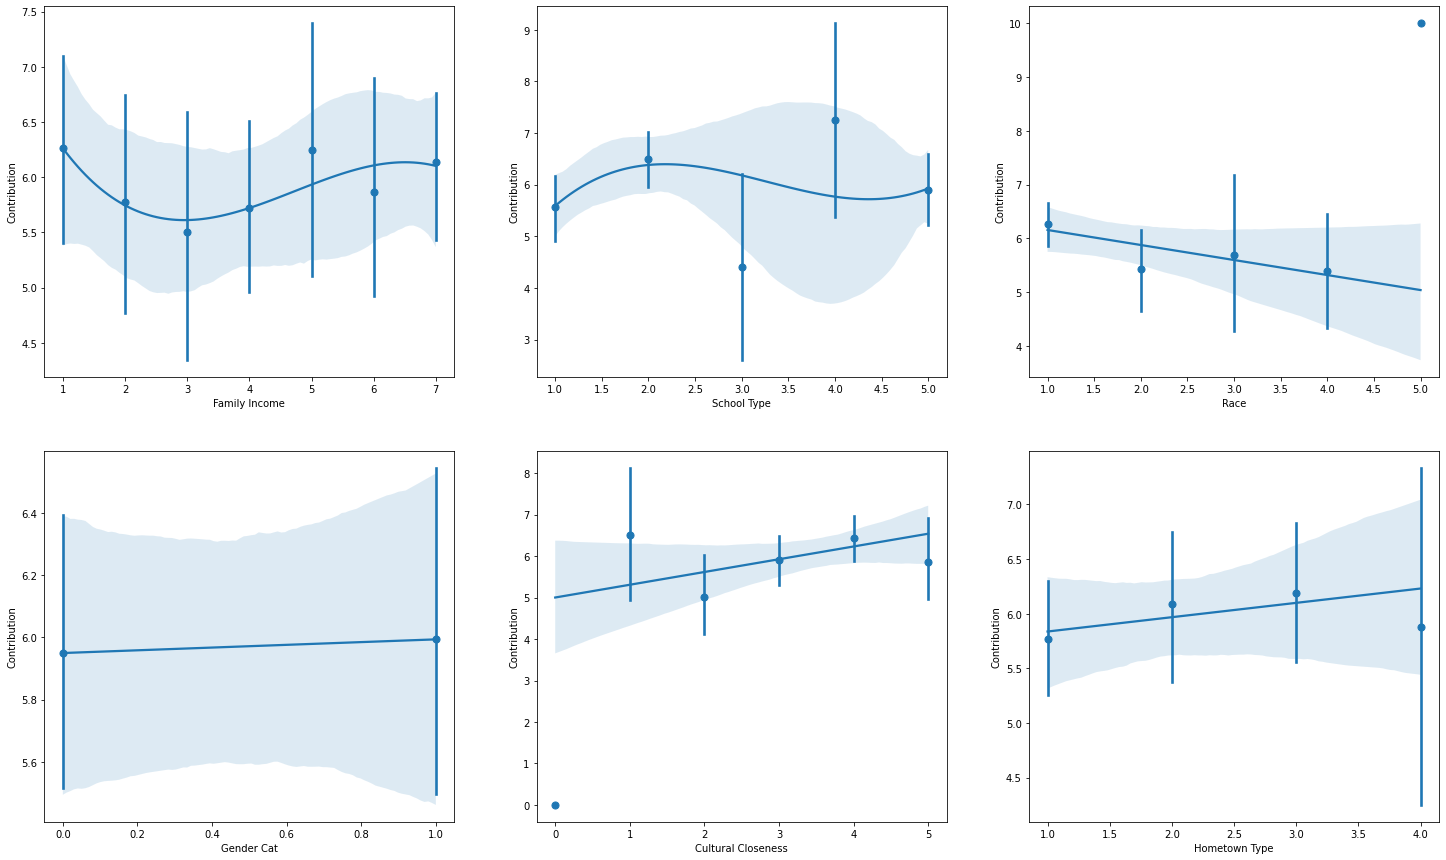

In [43]:
f, axes = plt.subplots(ncols = 3, nrows=2, figsize = (25,15))

sns.regplot(data=df, x="Family Income", y="Contribution", ax=axes[0,0], x_estimator=np.mean, order=3)
sns.regplot(data=df, x="School Type", y="Contribution", ax=axes[0,1], x_estimator=np.mean, order=3)
sns.regplot(data=df, x="Race", y="Contribution", ax=axes[0,2], x_estimator=np.mean)
sns.regplot(data=df, x="Gender Cat", y="Contribution", ax=axes[1,0], x_estimator=np.mean)
sns.regplot(data=df, x="Cultural Closeness", y="Contribution", ax=axes[1,1], x_estimator=np.mean, robust = True)
sns.regplot(data=df, x="Hometown Type", y="Contribution", ax=axes[1,2], x_estimator=np.mean, order=1)

This concludes (briefly and roughly) that people with higher family income has access to better education (subjectively)

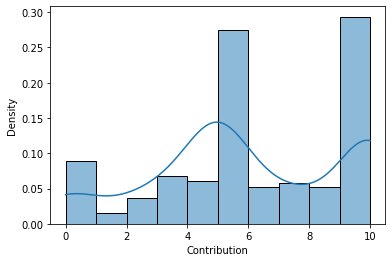

In [44]:
sns.histplot(df, x="Contribution", stat="density", kde=True)

***Tabulation of data***
Columns - Contribution
Rows - Quantities

In [45]:
df_faminc = df[["Family Income", "Contribution"]]
mean_faminc = df_faminc.groupby("Family Income").mean().add_prefix("Mean ")

(pd.get_dummies(df_faminc, columns = ["Contribution"]).groupby("Family Income").sum())

,Contribution_0,Contribution_1,Contribution_2,Contribution_3,Contribution_4,Contribution_5,Contribution_6,Contribution_7,Contribution_8,Contribution_9,Contribution_10
Family Income,,,,,,,,,,,
1,6,2,2,3,4,12,2,3,3,2,21
2,2,2,2,2,2,9,3,3,1,0,9
3,3,0,2,6,1,8,1,0,3,0,8
4,4,0,3,3,3,17,3,5,6,0,9
5,1,1,1,2,3,7,2,1,0,0,10
6,3,0,2,2,4,11,2,2,2,0,10
7,10,0,0,4,3,26,4,5,2,2,25


In [46]:
df_race = df[["Race", "Contribution"]]
mean_race = df_race.groupby("Race").mean().add_prefix("Mean ")

(pd.get_dummies(df_race, columns = ["Contribution"]).groupby("Race").sum())

,Contribution_0,Contribution_1,Contribution_2,Contribution_3,Contribution_4,Contribution_5,Contribution_6,Contribution_7,Contribution_8,Contribution_9,Contribution_10
Race,,,,,,,,,,,
1,16,1,4,12,14,54,11,14,12,2,61
2,6,4,5,6,3,20,2,3,3,1,17
3,2,0,2,2,1,7,1,0,0,0,7
4,5,0,1,2,2,9,3,2,2,1,6
5,0,0,0,0,0,0,0,0,0,0,1


In [47]:
df_school = df[["School Type", "Contribution"]]
mean_school = df_school.groupby("School Type").mean().add_prefix("Mean ")

(pd.get_dummies(df_school, columns = ["Contribution"]).groupby("School Type").sum())

,Contribution_0,Contribution_1,Contribution_2,Contribution_3,Contribution_4,Contribution_5,Contribution_6,Contribution_7,Contribution_8,Contribution_9,Contribution_10
School Type,,,,,,,,,,,
1,13,1,4,8,5,33,6,7,3,2,25
2,5,1,2,5,10,27,6,10,9,2,31
3,1,2,0,0,1,4,0,0,1,0,1
4,0,0,0,1,0,3,0,0,0,0,4
5,10,1,6,8,4,23,5,2,4,0,31


In [48]:
df_gender = df[["Gender Cat", "Contribution"]]
mean_gender = df_gender.groupby("Gender Cat").mean().add_prefix("Mean ")

(pd.get_dummies(df_gender, columns = ["Contribution"]).groupby("Gender Cat").sum())

,Contribution_0,Contribution_1,Contribution_2,Contribution_3,Contribution_4,Contribution_5,Contribution_6,Contribution_7,Contribution_8,Contribution_9,Contribution_10
Gender Cat,,,,,,,,,,,
0,13,2,8,11,10,55,13,8,10,1,47
1,16,3,4,11,10,35,4,11,7,3,45


In [49]:
df_culture = df[["Cultural Closeness", "Contribution"]]
mean_culture = df_culture.groupby("Cultural Closeness").mean().add_prefix("Mean ")

(pd.get_dummies(df_culture, columns = ["Contribution"]).groupby("Cultural Closeness").sum())

,Contribution_0,Contribution_1,Contribution_2,Contribution_3,Contribution_4,Contribution_5,Contribution_6,Contribution_7,Contribution_8,Contribution_9,Contribution_10
Cultural Closeness,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,1,1,0,2,0,0,7
2,6,1,1,4,3,12,4,2,2,0,7
3,8,1,3,6,7,31,5,6,8,0,24
4,4,3,7,9,4,33,4,7,6,4,39
5,8,0,0,0,5,13,4,2,1,0,15


In [50]:
df_home = df[["Hometown Type", "Contribution"]]
mean_home = df_home.groupby("Hometown Type").mean().add_prefix("Mean ")

(pd.get_dummies(df_home, columns = ["Contribution"]).groupby("Hometown Type").sum())

,Contribution_0,Contribution_1,Contribution_2,Contribution_3,Contribution_4,Contribution_5,Contribution_6,Contribution_7,Contribution_8,Contribution_9,Contribution_10
Hometown Type,,,,,,,,,,,
1,11,4,8,7,6,42,6,9,7,1,34
2,6,0,2,10,7,15,4,5,5,1,23
3,8,0,1,4,6,29,6,4,4,2,26
4,4,1,1,1,1,4,1,1,1,0,9


In [51]:
#.to_clipboard(excel = True)

In [53]:
"""f, axes = plt.subplots(ncols = 3, nrows=2, figsize = (25,15))

sns.lineplot(mean_faminc, ax=axes[0, 0])
sns.lineplot(mean_race, ax=axes[0, 1])
sns.lineplot(mean_gender, ax=axes[0, 2])
sns.lineplot(mean_home, ax=axes[1, 0])
sns.lineplot(mean_culture, ax=axes[1, 1])
sns.lineplot(mean_school, ax=axes[1, 2])"""

'f, axes = plt.subplots(ncols = 3, nrows=2, figsize = (25,15))\n\nsns.lineplot(mean_faminc, ax=axes[0, 0])\nsns.lineplot(mean_race, ax=axes[0, 1])\nsns.lineplot(mean_gender, ax=axes[0, 2])\nsns.lineplot(mean_home, ax=axes[1, 0])\nsns.lineplot(mean_culture, ax=axes[1, 1])\nsns.lineplot(mean_school, ax=axes[1, 2])'

***AI PART COMING SOONN !!!!!!!!!!!!!!!!!***

***Here it is***

Consider using random tree classifier to predict contribution based on parameters

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [55]:
x = df[["Cultural Closeness", "Race", "Hometown Type"]]
y = df[["Contribution"]]

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [57]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

<ipython-input-57-ffaa21cfb590>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


In [58]:
from sklearn.linear_model import LogisticRegression

xnew = df[["Cultural Closeness", "Race", "Hometown Type"]]
ynew = df[["Contribution"]]

In [59]:
newclf = LogisticRegression(max_iter=300)
newclf.fit(xnew, ynew)
ynew_pred = newclf.predict(xnew)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


***Check the accuracy using actual and predicted values***

In [60]:
from sklearn import metrics

In [61]:
print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.23232323232323232


In [62]:
print("Accuracy : ", metrics.accuracy_score(ynew, ynew_pred))

Accuracy :  0.3149847094801223


Here, we can conclude that the model is 21% accurate which is quite low but acceptable (for now)

In [63]:
#clf.predict([[3, 5, 4]]) is an example online
#newclf.predict([[3, 5, 4, 2]])

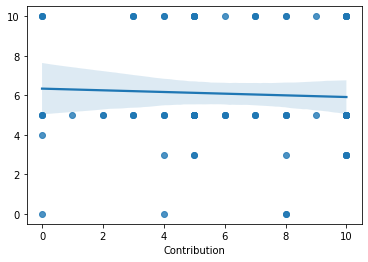

In [64]:
sns.regplot(x=y_test, y=y_pred)

***Marking important features***

In [65]:
features_imp = pd.Series(clf.feature_importances_, index = ["Cultural Closeness", "Race", "Hometown Type"]).sort_values(ascending = False)
features_imp

Cultural Closeness    0.404326
Hometown Type         0.310786
Race                  0.284887
dtype: float64

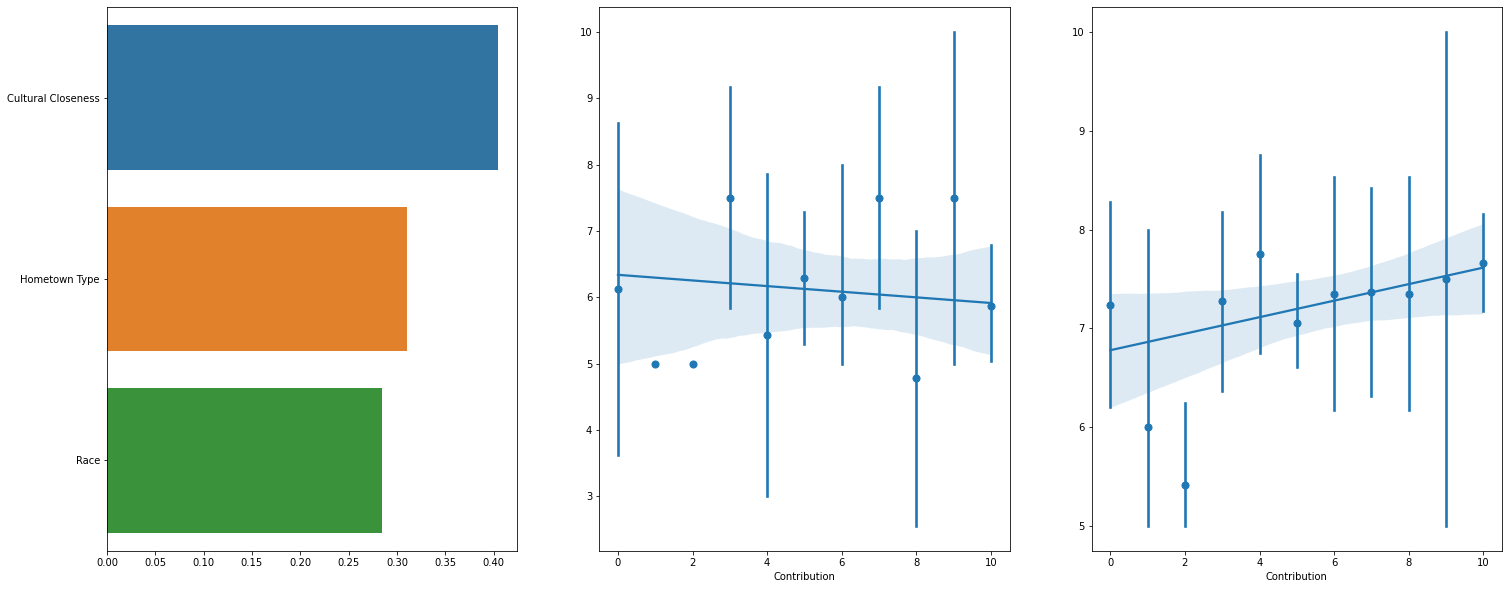

In [66]:
f, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 10))

sns.barplot(x = features_imp, y = features_imp.index, ax=axes[0])
sns.regplot(x = y_test, y = y_pred, ax=axes[1], x_estimator=np.mean)
sns.regplot(x = ynew, y = ynew_pred, ax=axes[2], x_estimator=np.mean)